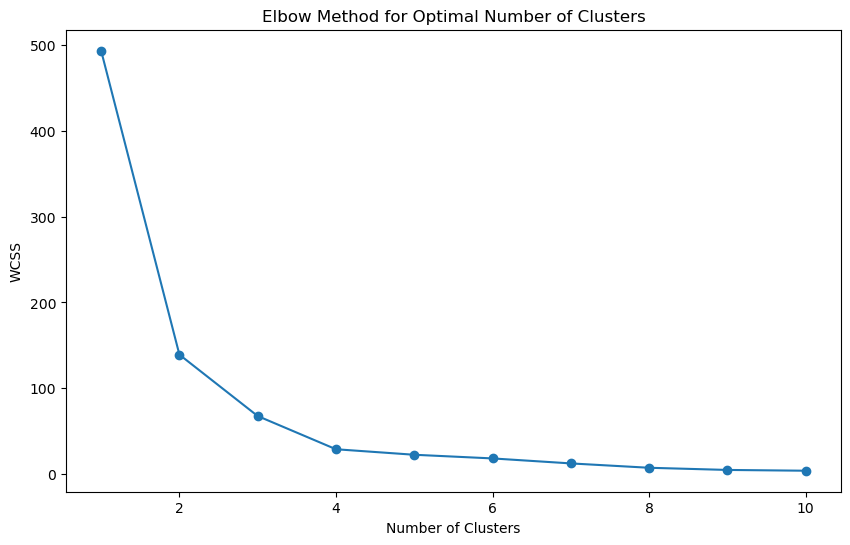

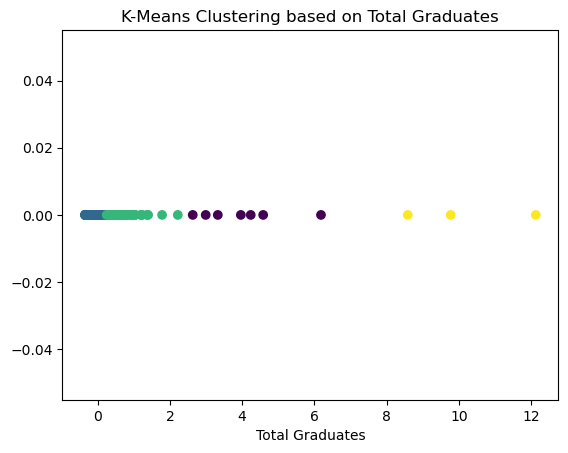

   name_of_city  total_graduates  cluster
0             0        -0.280994        1
1             1        -0.322787        1
2             2        -0.313206        1
3             3        -0.264455        1
4             4        -0.305679        1


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('./Datasets/cities_r2.csv')  # Change path if necessary

# Step 2: Data Preprocessing

# Handle missing values for numeric columns by filling with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for categorical columns by filling with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with the mode for categorical columns

# Label Encoding for categorical columns (for non-numeric features)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Data Transformation

# Standardizing the numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Apply K-Means clustering based on 'total_graduates' (you can select more columns if needed)
X = df[['total_graduates']]  # You can include more features here

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['total_graduates']])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering (let's choose 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 5: Visualize the results
plt.scatter(df['total_graduates'], [0] * len(df), c=df['cluster'], cmap='viridis')
plt.xlabel('Total Graduates')
plt.title('K-Means Clustering based on Total Graduates')
plt.show()

# Step 6: View the grouped data
print(df[['name_of_city', 'total_graduates', 'cluster']].head())
